In [33]:
from cont3d import contactmaps
import glob
from polychrom.hdf5_format import HDF5Reporter, list_URIs, load_URI, load_hdf5_file, save_hdf5_file
import polychrom
import numpy as np

In [13]:
# list of conformation URIs
filenames = sum([list_URIs(i) for i in glob.glob("/net/wiz/home/magus/data/Simulations/carolynSimulations/enhancerPaperToyExample/newSweep4_5*")],[])

In [55]:
filenames = filenames[:1000]

In [70]:
# Making a 500x500x500 contactmap with 50-monomer resolution
# using the first 500 * 50 = 25000 monomers of a conformation

N = 500
resolution = 50

In [71]:
def example_contact_finder(data, cutoff=5):
    conts = polychrom.polymer_analyses.calculate_contacts(data[:(N*resolution)], cutoff=5)
    conts = np.unique(conts // resolution, axis=0)
    return conts

In [72]:
data = load_URI(filenames[10])
example_contact_finder(data['pos'])[:10]

array([[ 0,  0],
       [ 0,  1],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 29],
       [ 0, 30],
       [ 0, 47],
       [ 0, 48],
       [ 0, 54]])

In [ ]:
hmap = contactmaps.triplet_map(N, filenames, n_threads=20, contact_finder=example_contact_finder)

In [68]:
import matplotlib.pyplot as plt

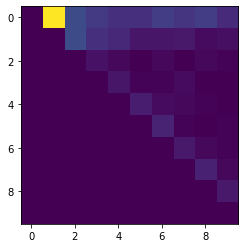

In [69]:
plt.figure()
plt.imshow(hmap[0])